In [91]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch


In [92]:
datasets = load_datasets()

In [93]:
ds_name = 'cmc'
test_on_all_folds = True
test_all_ds = True

In [94]:
datasets = ex.one_hot_encode_all(datasets)

In [95]:
config = ex.config_calculation_strategy3(datasets)

In [96]:
np.unique(datasets["new_yeast"]['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [97]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 200}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 2},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 16,
  'gamma': 0.9,
  'epochs': 100}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 150}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.00001,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 70}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0003,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [98]:
from experiment import dt_name_to_cols_to_encode

In [99]:
for dataset_name in dt_name_to_cols_to_encode:
    data, target = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    config[f"{dataset_name}"]['nn_config']['units_decision_layer'] = np.unique(target).size
    config[f"{dataset_name}_encoded"]['nn_config']['units_decision_layer'] = np.unique(target).size

In [100]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_

cmc


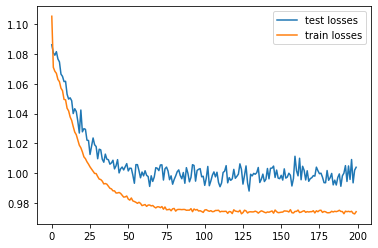

Softmax-f1: 0.359
Softmax-gmean: 0.072


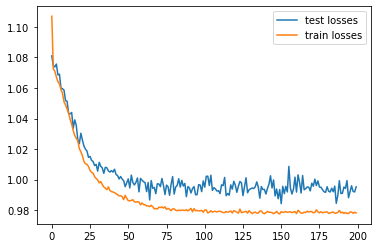

Softmax-f1: 0.346
Softmax-gmean: 0.07


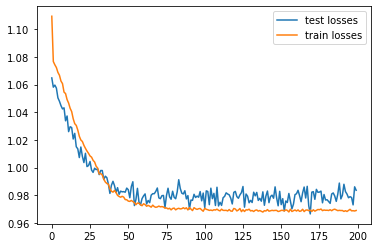

Softmax-f1: 0.413
Softmax-gmean: 0.365


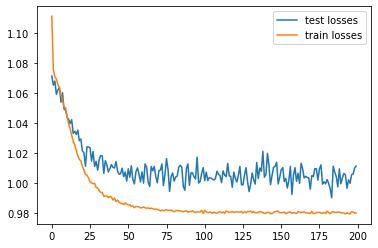

Softmax-f1: 0.367
Softmax-gmean: 0.241


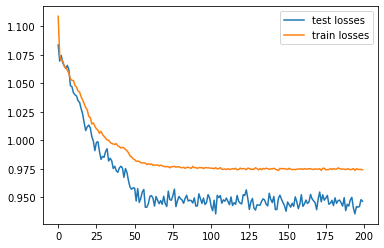

Softmax-f1: 0.501
Softmax-gmean: 0.454
dermatology


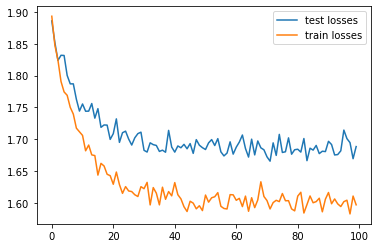

Softmax-f1: 0.132
Softmax-gmean: 0.008


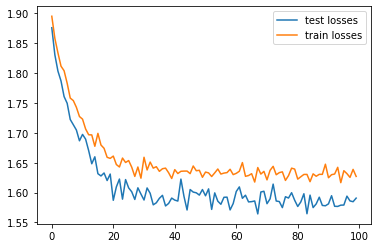

Softmax-f1: 0.117
Softmax-gmean: 0.007


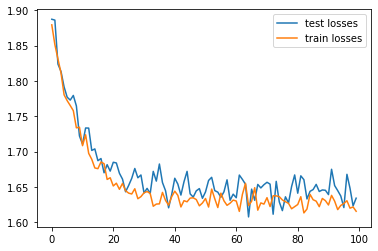

Softmax-f1: 0.141
Softmax-gmean: 0.008


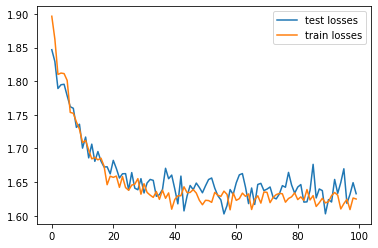

Softmax-f1: 0.136
Softmax-gmean: 0.008


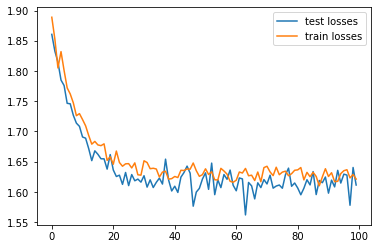

Softmax-f1: 0.127
Softmax-gmean: 0.008
hayes-roth


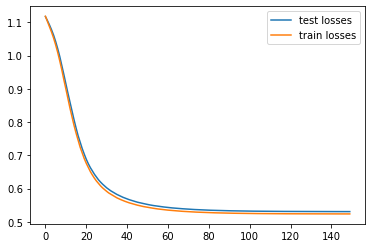

Softmax-f1: 0.838
Softmax-gmean: 0.814


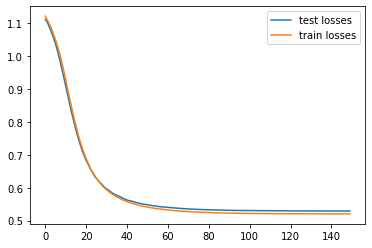

Softmax-f1: 0.897
Softmax-gmean: 0.892


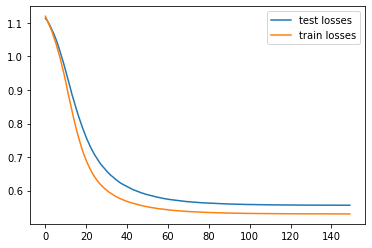

Softmax-f1: 0.895
Softmax-gmean: 0.885


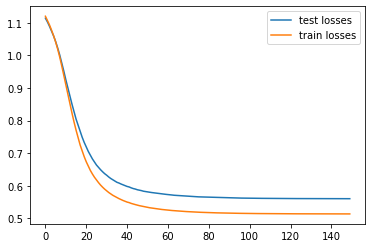

Softmax-f1: 0.749
Softmax-gmean: 0.727


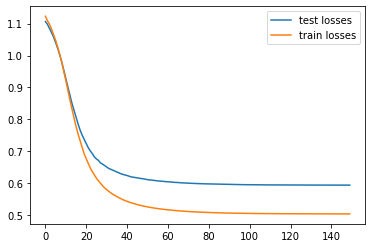

Softmax-f1: 0.661
Softmax-gmean: 0.603
new_vehicle


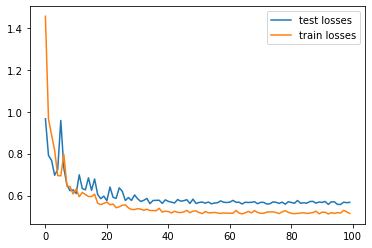

Softmax-f1: 0.709
Softmax-gmean: 0.708


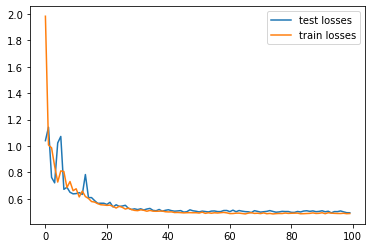

Softmax-f1: 0.824
Softmax-gmean: 0.816


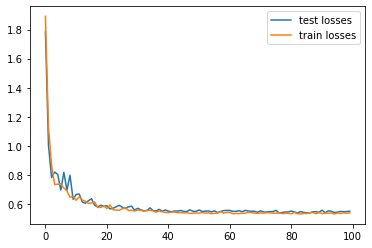

Softmax-f1: 0.745
Softmax-gmean: 0.746


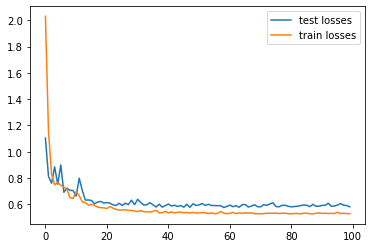

Softmax-f1: 0.717
Softmax-gmean: 0.685


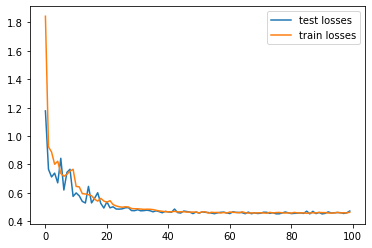

Softmax-f1: 0.857
Softmax-gmean: 0.856
new_yeast


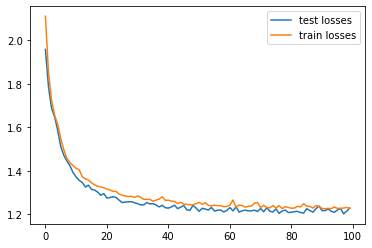

Softmax-f1: 0.414
Softmax-gmean: 0.123


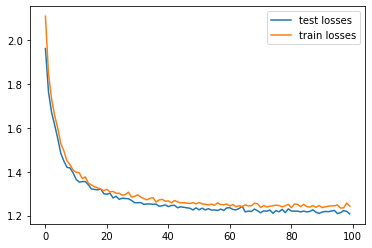

Softmax-f1: 0.402
Softmax-gmean: 0.112


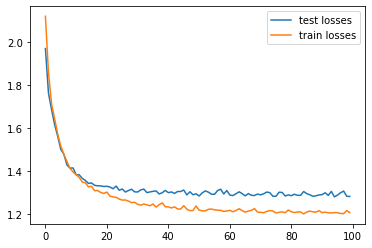

Softmax-f1: 0.354
Softmax-gmean: 0.067


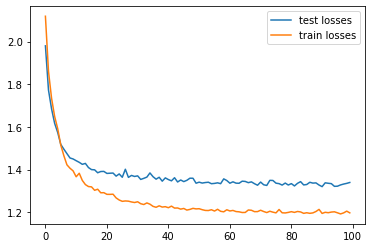

Softmax-f1: 0.354
Softmax-gmean: 0.064


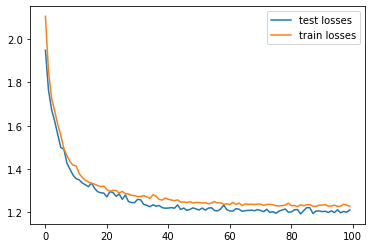

Softmax-f1: 0.355
Softmax-gmean: 0.065
1czysty-cut


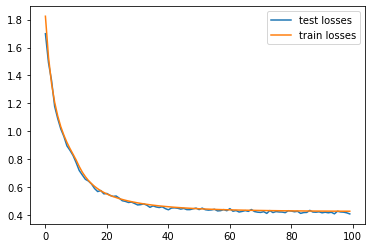

Softmax-f1: 0.496
Softmax-gmean: 0.077


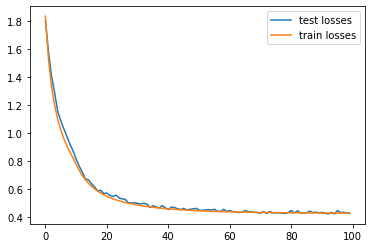

Softmax-f1: 0.515
Softmax-gmean: 0.318


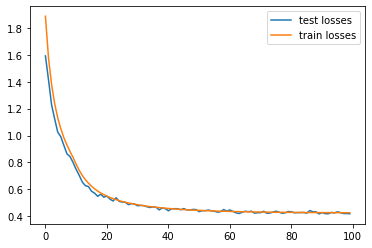

Softmax-f1: 0.524
Softmax-gmean: 0.328


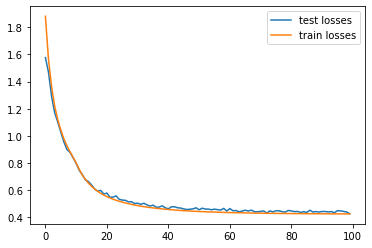

Softmax-f1: 0.508
Softmax-gmean: 0.317


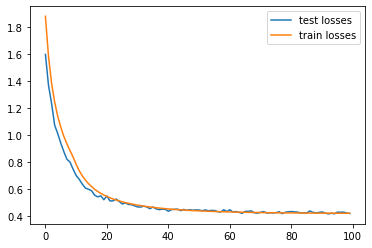

Softmax-f1: 0.415
Softmax-gmean: 0.204
2delikatne-cut


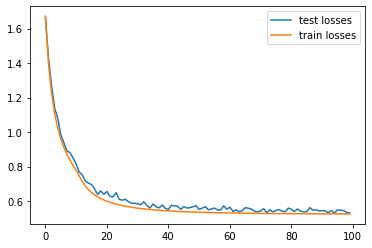

Softmax-f1: 0.326
Softmax-gmean: 0.044


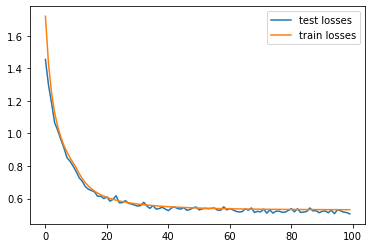

Softmax-f1: 0.337
Softmax-gmean: 0.12


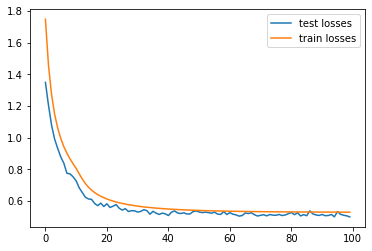

Softmax-f1: 0.329
Softmax-gmean: 0.12


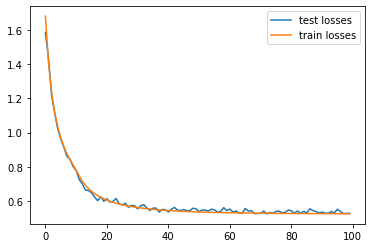

Softmax-f1: 0.362
Softmax-gmean: 0.137


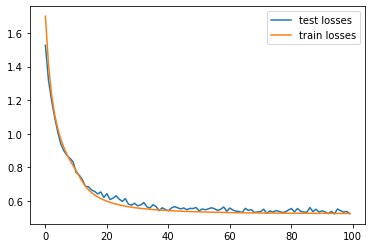

Softmax-f1: 0.317
Softmax-gmean: 0.043
3mocniej-cut


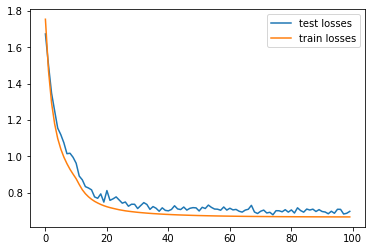

Softmax-f1: 0.316
Softmax-gmean: 0.043


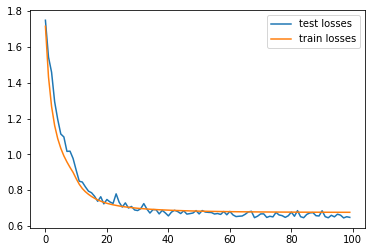

Softmax-f1: 0.29
Softmax-gmean: 0.027


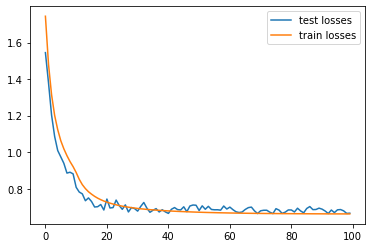

Softmax-f1: 0.301
Softmax-gmean: 0.035


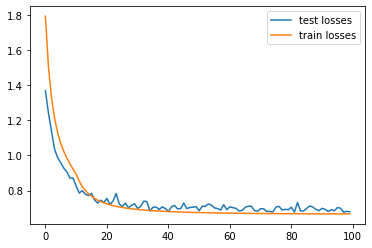

Softmax-f1: 0.316
Softmax-gmean: 0.095


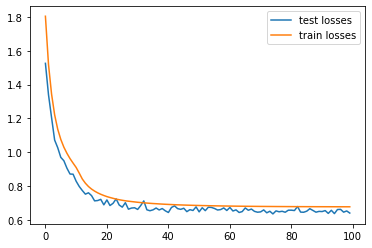

Softmax-f1: 0.302
Softmax-gmean: 0.035
4delikatne-bezover-cut


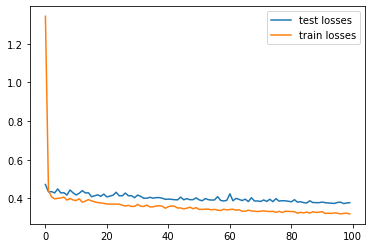

Softmax-f1: 0.684
Softmax-gmean: 0.595


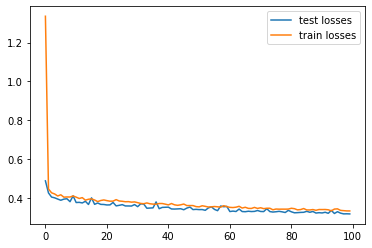

Softmax-f1: 0.753
Softmax-gmean: 0.681


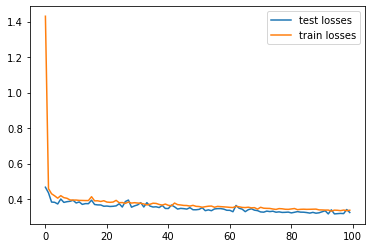

Softmax-f1: 0.724
Softmax-gmean: 0.651


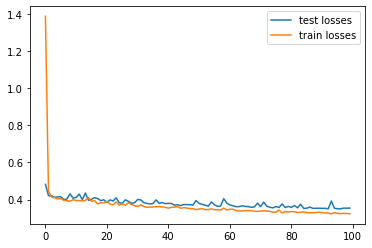

Softmax-f1: 0.62
Softmax-gmean: 0.48


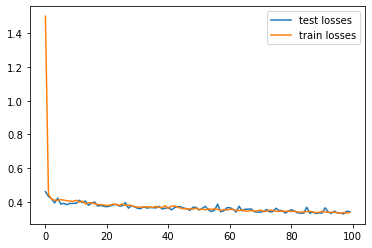

Softmax-f1: 0.679
Softmax-gmean: 0.577
balance-scale


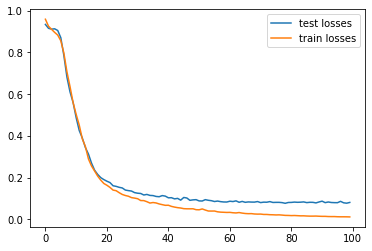

Softmax-f1: 0.948
Softmax-gmean: 0.982


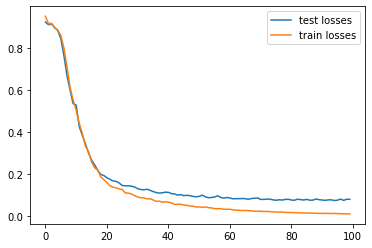

Softmax-f1: 0.933
Softmax-gmean: 0.977


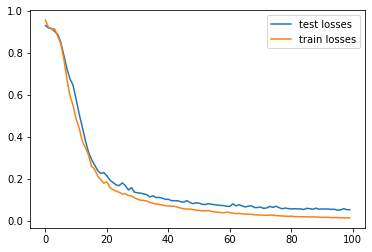

Softmax-f1: 0.964
Softmax-gmean: 0.988


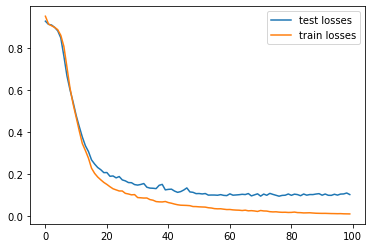

Softmax-f1: 0.919
Softmax-gmean: 0.971


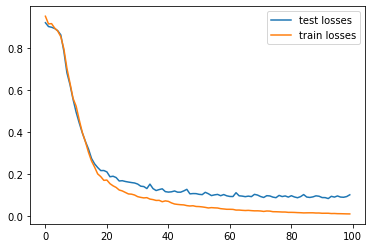

Softmax-f1: 0.913
Softmax-gmean: 0.971
cleveland


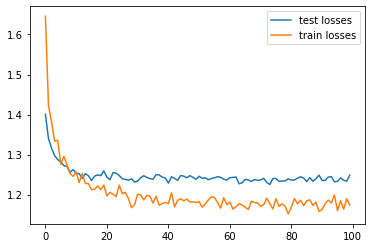

Softmax-f1: 0.142
Softmax-gmean: 0.004


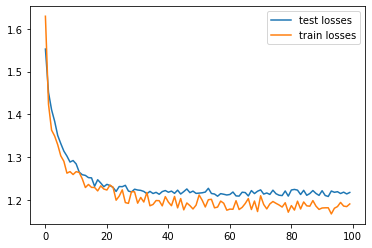

Softmax-f1: 0.14
Softmax-gmean: 0.004


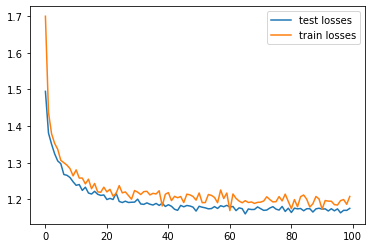

Softmax-f1: 0.215
Softmax-gmean: 0.012


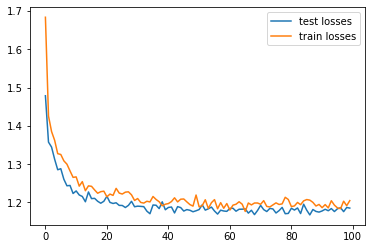

Softmax-f1: 0.239
Softmax-gmean: 0.013


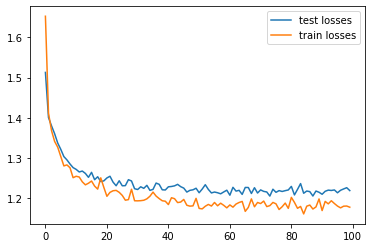

Softmax-f1: 0.18
Softmax-gmean: 0.01
cleveland_v2


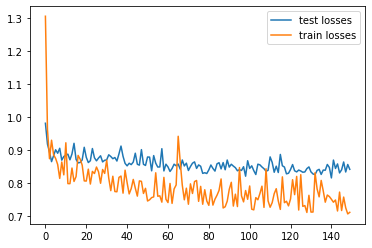

Softmax-f1: 0.212
Softmax-gmean: 0.006


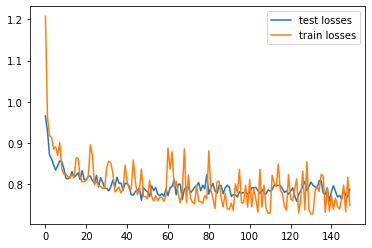

Softmax-f1: 0.371
Softmax-gmean: 0.079


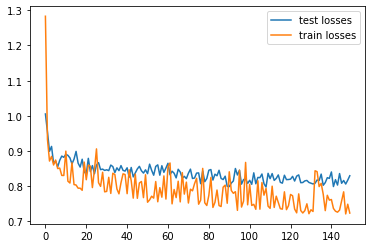

Softmax-f1: 0.21
Softmax-gmean: 0.006


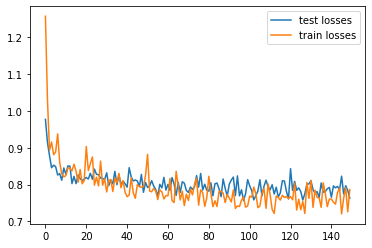

Softmax-f1: 0.213
Softmax-gmean: 0.006


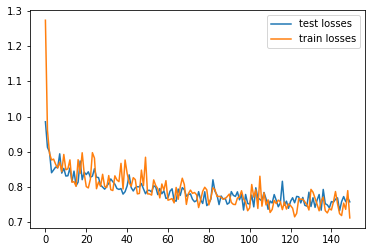

Softmax-f1: 0.209
Softmax-gmean: 0.006
glass


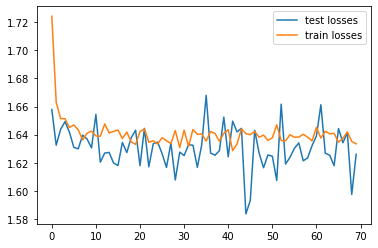

Softmax-f1: 0.086
Softmax-gmean: 0.003


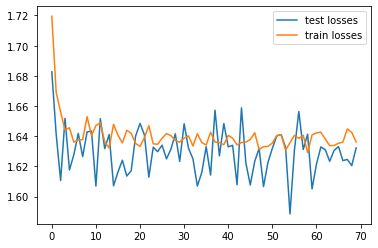

Softmax-f1: 0.09
Softmax-gmean: 0.003


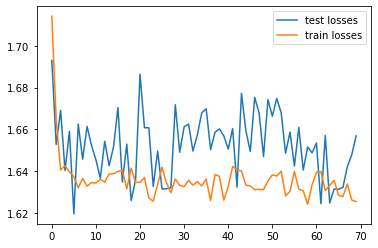

Softmax-f1: 0.086
Softmax-gmean: 0.003


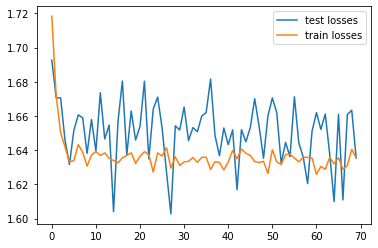

Softmax-f1: 0.086
Softmax-gmean: 0.003


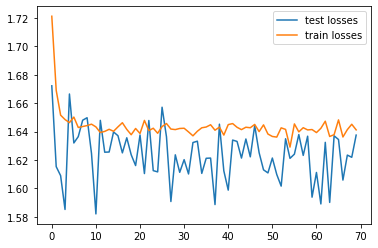

Softmax-f1: 0.088
Softmax-gmean: 0.003
new_ecoli


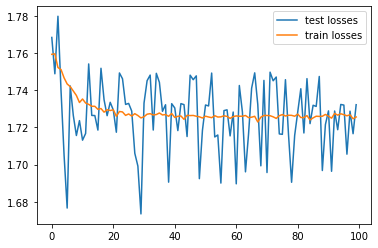

Softmax-f1: 0.027
Softmax-gmean: 0.004


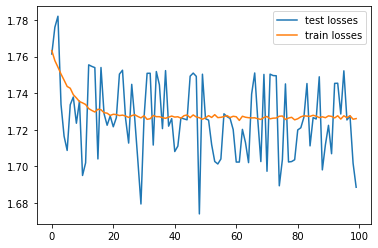

Softmax-f1: 0.028
Softmax-gmean: 0.004


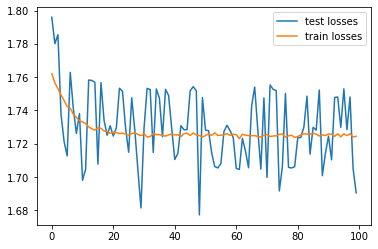

Softmax-f1: 0.028
Softmax-gmean: 0.004


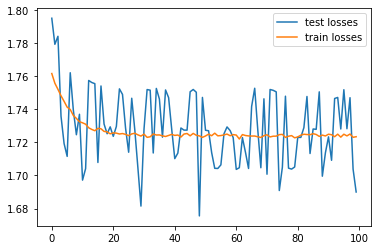

Softmax-f1: 0.028
Softmax-gmean: 0.004


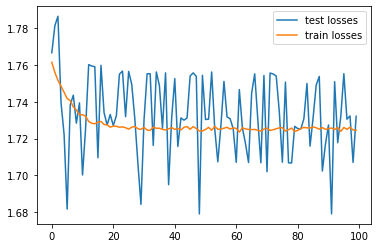

Softmax-f1: 0.028
Softmax-gmean: 0.004
new_led7digit


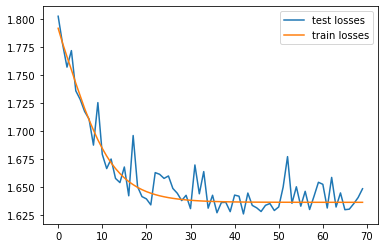

Softmax-f1: 0.427
Softmax-gmean: 0.076


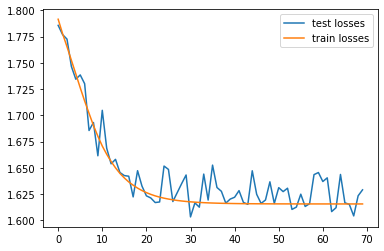

Softmax-f1: 0.311
Softmax-gmean: 0.132


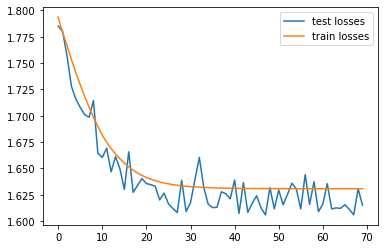

Softmax-f1: 0.445
Softmax-gmean: 0.077


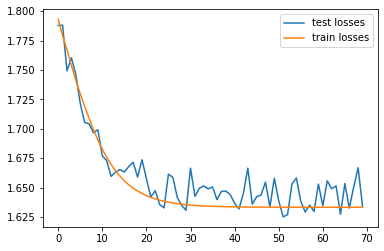

Softmax-f1: 0.277
Softmax-gmean: 0.054


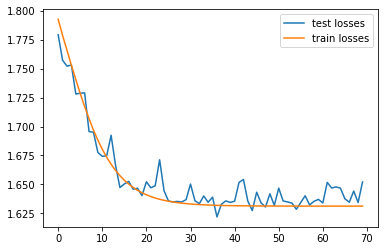

Softmax-f1: 0.294
Softmax-gmean: 0.057
new_winequality-red


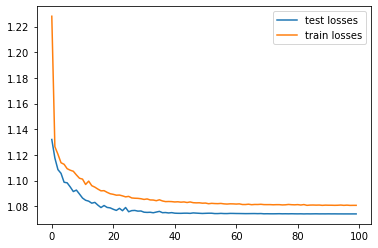

Softmax-f1: 0.289
Softmax-gmean: 0.055


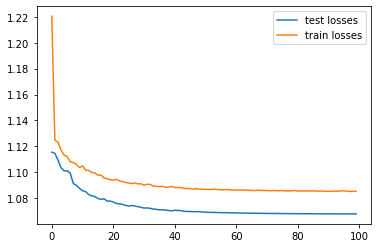

Softmax-f1: 0.294
Softmax-gmean: 0.055


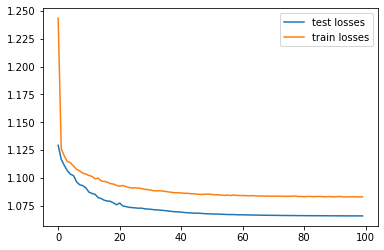

Softmax-f1: 0.267
Softmax-gmean: 0.024


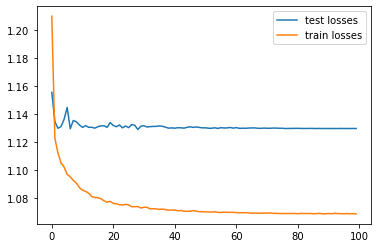

Softmax-f1: 0.283
Softmax-gmean: 0.064


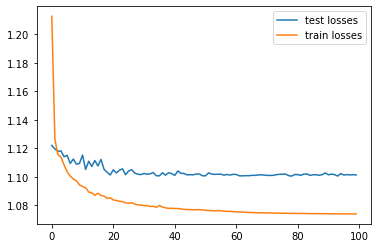

Softmax-f1: 0.251
Softmax-gmean: 0.023
thyroid-newthyroid


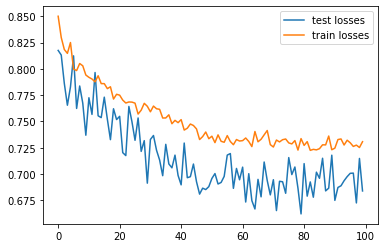

Softmax-f1: 0.373
Softmax-gmean: 0.055


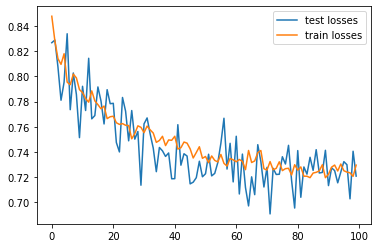

Softmax-f1: 0.274
Softmax-gmean: 0.01


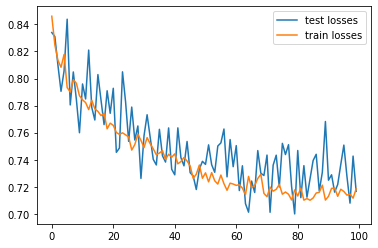

Softmax-f1: 0.274
Softmax-gmean: 0.01


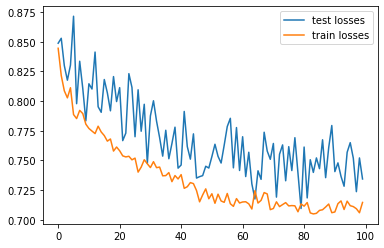

Softmax-f1: 0.373
Softmax-gmean: 0.055


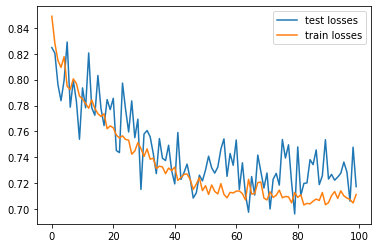

Softmax-f1: 0.373
Softmax-gmean: 0.055


In [101]:
result_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        
        cfg = config[dataset_name]
        
        model = ex.train_classification(X_train_enc, y_train, X_test_enc, y_test, cfg)
        
        dataset2 = TensorDataset(torch.Tensor(X_test_enc), torch.Tensor(y_test))
        test_loader = torch.utils.data.DataLoader(dataset2, batch_size=1)
        
        use_cuda = True
        device = torch.device("cuda" if use_cuda else "cpu")
        
        preds = []
        model.eval()
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                preds.append(pred.item())
#                 print(f"Pred: {pred.item()}, target: {target.item()}, output: {output}")

        clf_name = "Softmax"
        gmean = gmean_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='macro')
        fold_result_dict[f"{clf_name}-f1"].append(f1)
        fold_result_dict[f"{clf_name}-gmean"].append(gmean)
            
        
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

In [102]:
results_df = pd.DataFrame.from_dict(result_dict)

In [103]:
results_df

,dataset,Softmax-f1,Softmax-gmean
0,cmc,0.397074,0.240572
1,dermatology,0.130620,0.007918
2,hayes-roth,0.807688,0.784209
3,new_vehicle,0.770436,0.762444
4,new_yeast,0.376005,0.085955
5,1czysty-cut,0.491568,0.248763
6,2delikatne-cut,0.334317,0.092956
7,3mocniej-cut,0.304754,0.047093
8,4delikatne-bezover-cut,0.691993,0.596808
9,balance-scale,0.935086,0.977828


In [104]:
results_df.filter(regex=("dataset|Softmax-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,Softmax-f1
0,cmc,0.397074
1,dermatology,0.130620
2,hayes-roth,0.807688
3,new_vehicle,0.770436
4,new_yeast,0.376005
5,1czysty-cut,0.491568
6,2delikatne-cut,0.334317
7,3mocniej-cut,0.304754
8,4delikatne-bezover-cut,0.691993
9,balance-scale,0.935086


In [105]:
results_df.filter(regex=("dataset|Softmax-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,Softmax-gmean
0,cmc,0.240572
1,dermatology,0.007918
2,hayes-roth,0.784209
3,new_vehicle,0.762444
4,new_yeast,0.085955
5,1czysty-cut,0.248763
6,2delikatne-cut,0.092956
7,3mocniej-cut,0.047093
8,4delikatne-bezover-cut,0.596808
9,balance-scale,0.977828
